In [2]:

from pandas import read_csv
import pandas as pd
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
from pandas import read_csv
import pandas as pd
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# load data
#url = "/content/drive/MyDrive/Thub_netlist.csv"
#names = ['Number of ports', 'Number of nets', 'Number of cells', 'Number of combinational cells', 'Number of sequential cells', 'Number of buf/inv', 'Number of references', 'Combinational area', 'Buf/Inv area','Noncombinational area','Macro/Black Box area','Total cell area','Cell Internal Power (mW)','Net Switching Power (mW)','Total Dynamic Power (mW)','Cell Leakage Power (mW)','IO_Pad Internal Power','IO_Pad Switching Power','IO_Pad Leakage Power','IO_Pad Total Power','Memory Internal Power','Memory Switching Power','Memory Leakage Power','Memory Total Power','Black_Box Internal Power','Black_Box Switching Power','Black_Box Leakage Power','Black_Box Total Power','Clock_Network Internal Power','Clock_Network Switching Power','Clock_Network Leakage Power','Clock_Network Total Power','Register Internal Power','Register Switching Power','Register Leakage Power','Register Total Power','Sequential Internal Power','Sequential Switching Power','Sequential Leakage Power','Sequential Total Power','Combinational Internal Power','Combinational Switching Power','Combinational Leakage Power','Combinational Total Power','Total Internal Power','Total Switching Power','Total Leakage Power','Total Total Power','Label','Circuit']
#dataframe = pd.read_csv(url, names=names)
#array = dataframe.values
#X = array[:,0:8]
#Y = array[:,8]

In [4]:
df=pd.read_csv('/content/drive/MyDrive/short_csv_latest_11-10-21.csv', sep = r',',skipinitialspace=True)


In [5]:
df=df.dropna(axis=1,how="any")

In [6]:
df=df.drop(columns=['Circuit Name'])

In [7]:
df.astype(float)
pd.options.display.float_format = '{:.1f}'.format
df

,No. of primary input gates,No. of primary output gates,No. of wires,No. of non-primary input gates,No. of non-primary output gates,No. of 3 or more input gates,sum CC0,sum CC1,sum CO,No. of AND,...,Obth L = 60,Obth L = 65,Obth L = 70,Obth L = 75,Obth L = 80,Obth L = 85,Obth L = 90,Obth L = 95,Obth L = 100,Label
0,257,128,970168,661048,316608,55232,18790400.0,25838752.0,1062307080.0,88416,...,2744.0,2401.0,2058.0,1715.0,1372.0,1029.0,686.0,343.0,0.0,0
1,2,2,120,85,45,8,4337.0,2640.0,172358.0,1,...,2570.0,2248.8,1927.5,1606.2,1285.0,963.8,642.5,321.2,0.0,0
2,1,1,67,48,26,4,7799.0,4656.0,176428.0,1,...,3725.6,3259.9,2794.2,2328.5,1862.8,1397.1,931.4,465.7,0.0,0
3,4,4,424,284,152,20,55204.0,37991.0,5664984.0,2,...,20834.4,18230.1,15625.8,13021.5,10417.2,7812.9,5208.6,2604.3,0.0,0
4,11,8,1927,1333,718,53,75148226289073.0,41453859876674.0,3723866289844357.0,35,...,3899295931520.0,3411883940080.0,2924471948640.0,2437059957200.0,1949647965760.0,1462235974320.0,974823982880.0,487411991440.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,38,321,35806,27044,15242,297,20818.0,53103.0,2355603.0,3716,...,168.4,147.4,126.3,105.2,84.2,63.1,42.1,21.1,0.0,1
474,36,7,408,336,160,19,2076.0,1046.0,12332.0,4,...,57.2,50.0,42.9,35.8,28.6,21.5,14.3,7.2,0.0,0
475,50,22,2947,2127,1141,5,20207.0,19978.0,429461.0,5,...,272.4,238.3,204.3,170.2,136.2,102.1,68.1,34.0,0.0,0
476,50,22,2947,2127,1141,5,20207.0,19978.0,429461.0,5,...,272.4,238.3,204.3,170.2,136.2,102.1,68.1,34.0,0.0,0


In [8]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna('mean', inplace=True)

In [9]:
df

,No. of primary input gates,No. of primary output gates,No. of wires,No. of non-primary input gates,No. of non-primary output gates,No. of 3 or more input gates,sum CC0,sum CC1,sum CO,No. of AND,...,Obth L = 60,Obth L = 65,Obth L = 70,Obth L = 75,Obth L = 80,Obth L = 85,Obth L = 90,Obth L = 95,Obth L = 100,Label
0,257,128,970168,661048,316608,55232,18790400.0,25838752.0,1062307080.0,88416,...,2744.0,2401.0,2058.0,1715.0,1372.0,1029.0,686.0,343.0,0.0,0
1,2,2,120,85,45,8,4337.0,2640.0,172358.0,1,...,2570.0,2248.8,1927.5,1606.2,1285.0,963.8,642.5,321.2,0.0,0
2,1,1,67,48,26,4,7799.0,4656.0,176428.0,1,...,3725.6,3259.9,2794.2,2328.5,1862.8,1397.1,931.4,465.7,0.0,0
3,4,4,424,284,152,20,55204.0,37991.0,5664984.0,2,...,20834.4,18230.1,15625.8,13021.5,10417.2,7812.9,5208.6,2604.3,0.0,0
4,11,8,1927,1333,718,53,75148226289073.0,41453859876674.0,3723866289844357.0,35,...,3899295931520.0,3411883940080.0,2924471948640.0,2437059957200.0,1949647965760.0,1462235974320.0,974823982880.0,487411991440.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,38,321,35806,27044,15242,297,20818.0,53103.0,2355603.0,3716,...,168.4,147.4,126.3,105.2,84.2,63.1,42.1,21.1,0.0,1
474,36,7,408,336,160,19,2076.0,1046.0,12332.0,4,...,57.2,50.0,42.9,35.8,28.6,21.5,14.3,7.2,0.0,0
475,50,22,2947,2127,1141,5,20207.0,19978.0,429461.0,5,...,272.4,238.3,204.3,170.2,136.2,102.1,68.1,34.0,0.0,0
476,50,22,2947,2127,1141,5,20207.0,19978.0,429461.0,5,...,272.4,238.3,204.3,170.2,136.2,102.1,68.1,34.0,0.0,0


In [10]:
df.head()

,No. of primary input gates,No. of primary output gates,No. of wires,No. of non-primary input gates,No. of non-primary output gates,No. of 3 or more input gates,sum CC0,sum CC1,sum CO,No. of AND,...,Obth L = 60,Obth L = 65,Obth L = 70,Obth L = 75,Obth L = 80,Obth L = 85,Obth L = 90,Obth L = 95,Obth L = 100,Label
0,257,128,970168,661048,316608,55232,18790400.0,25838752.0,1062307080.0,88416,...,2744.0,2401.0,2058.0,1715.0,1372.0,1029.0,686.0,343.0,0.0,0
1,2,2,120,85,45,8,4337.0,2640.0,172358.0,1,...,2570.0,2248.8,1927.5,1606.2,1285.0,963.8,642.5,321.2,0.0,0
2,1,1,67,48,26,4,7799.0,4656.0,176428.0,1,...,3725.6,3259.9,2794.2,2328.5,1862.8,1397.1,931.4,465.7,0.0,0
3,4,4,424,284,152,20,55204.0,37991.0,5664984.0,2,...,20834.4,18230.1,15625.8,13021.5,10417.2,7812.9,5208.6,2604.3,0.0,0
4,11,8,1927,1333,718,53,75148226289073.0,41453859876674.0,3723866289844357.0,35,...,3899295931520.0,3411883940080.0,2924471948640.0,2437059957200.0,1949647965760.0,1462235974320.0,974823982880.0,487411991440.0,0.0,0


In [11]:

from pandas import read_csv
import pandas as pd
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
import numpy as np

In [12]:
arr=np.array(df.values)

In [13]:
X=arr[1:,0:604]
X=X.astype('float')
Y=(arr[1:,603]).astype('float')

In [14]:
X.shape

(477, 604)

In [15]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [16]:
Y.shape

(477,)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-1.04994014, -0.81357194, -0.18232455, ..., -0.06511366,
         0.04583492, -2.37170825],
       [-1.06505381, -0.82484202, -0.18281609, ..., -0.06511366,
         0.04583492, -2.37170825],
       [-1.01971282, -0.79103179, -0.17950512, ..., -0.06511366,
         0.04583492, -2.37170825],
       ...,
       [-0.32448432, -0.58817041, -0.15610573, ..., -0.06511366,
         0.04583492, -2.37170825],
       [-0.32448432, -0.58817041, -0.15610573, ..., -0.06511366,
         0.04583492, -2.37170825],
       [-0.32448432, -0.58817041, -0.15610573, ..., -0.06511366,
         0.04583492, -2.37170825]])

In [19]:
print(Y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [20]:
X.shape

(477, 604)

In [21]:
from sklearn.decomposition import PCA

In [22]:
# feature extraction
pca = PCA(n_components=250)
X_pca= pca.fit_transform(X)

In [23]:
len(X) == len(Y)

True

In [24]:
X_pca.shape

(477, 250)

In [25]:
X.shape

(477, 604)

In [26]:
Y.shape

(477,)

In [27]:
X_pca

array([[ 6.23436635e+00,  1.72382892e+01,  2.20299268e+01, ...,
        -1.41251242e-11, -7.51260340e-11,  8.95321354e-11],
       [ 6.59884147e+00,  1.80289466e+01,  2.40090557e+01, ...,
        -8.66890216e-11,  2.18335262e-11, -1.51501919e-10],
       [ 1.48999790e+01,  2.90975975e+01,  2.66757114e+01, ...,
        -8.21342479e-11,  3.32749409e-11,  4.67857286e-11],
       ...,
       [-4.04271499e+00, -2.11123683e+00, -2.00054753e+00, ...,
         9.95538989e-07, -1.11741136e-07,  2.40095692e-06],
       [-4.04271499e+00, -2.11123683e+00, -2.00054753e+00, ...,
         9.95538989e-07, -1.11741136e-07,  2.40095692e-06],
       [-4.04271499e+00, -2.11123683e+00, -2.00054753e+00, ...,
         9.95538989e-07, -1.11741136e-07,  2.40095692e-06]])

In [28]:
print(X_pca.sort())


None


In [29]:
print(type(X_pca))

<class 'numpy.ndarray'>


In [30]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, Y_train, Y_test= train_test_split(X_pca, Y, test_size= 0.2, random_state=100)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



Random Forest

In [32]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


0.9791666666666666
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        14
         1.0       0.99      0.99      0.99        82

    accuracy                           0.98        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.98      0.98      0.98        96



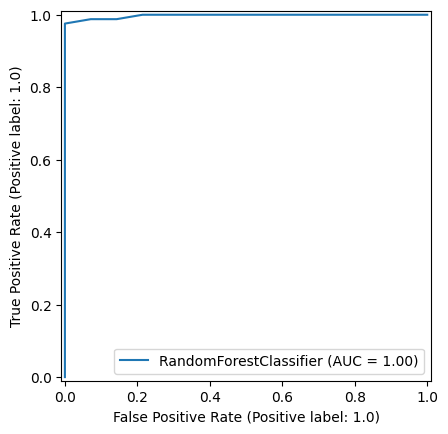

In [33]:

clf = RandomForestClassifier(n_estimators =10)

clf.fit(X_train_pca, Y_train)


Y_pred = clf.predict(X_test_pca)
print(accuracy_score(Y_test,Y_pred))

from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))



metrics.RocCurveDisplay.from_estimator(clf , X_test_pca, Y_test)
plt.show()


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

98.95833333333334
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        14
         1.0       0.99      1.00      0.99        82

    accuracy                           0.99        96
   macro avg       0.99      0.96      0.98        96
weighted avg       0.99      0.99      0.99        96



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


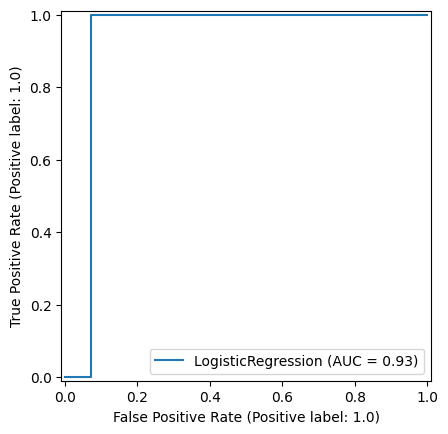

In [ ]:

clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=300,multi_class='ovr')

clf.fit(X_train_pca, Y_train)


Y_pred = clf.predict(X_test_pca)


accuracy = 100 * accuracy_score(Y_test, Y_pred)


print(accuracy)

from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))


metrics.RocCurveDisplay.from_estimator(clf , X_test_pca, Y_test)
plt.show()


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


96.875
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89        14
         1.0       0.98      0.99      0.98        82

    accuracy                           0.97        96
   macro avg       0.95      0.92      0.94        96
weighted avg       0.97      0.97      0.97        96



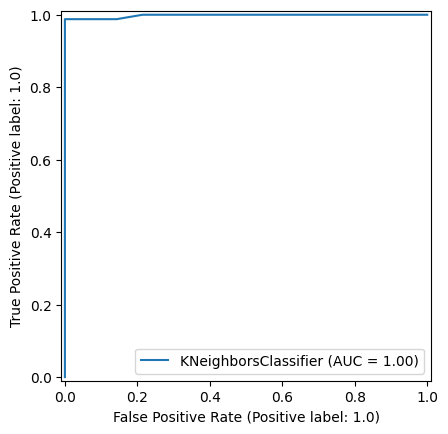

In [ ]:


clf = KNeighborsClassifier(n_neighbors=20)

clf.fit(X_train_pca, Y_train)

Y_pred = clf.predict(X_test_pca)

accuracy = 100 * accuracy_score(Y_test, Y_pred)

print(accuracy)

from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))


metrics.RocCurveDisplay.from_estimator(clf , X_test_pca, Y_test)
plt.show()


XGBOOST

In [ ]:
from xgboost import XGBClassifier


97.91666666666666
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        14
         1.0       0.99      0.99      0.99        82

    accuracy                           0.98        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.98      0.98      0.98        96



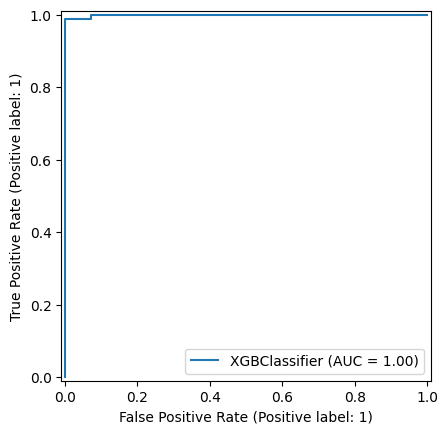

In [ ]:


clf = XGBClassifier(n_estimators=20)

clf.fit(X_train_pca, Y_train)

Y_pred = clf.predict(X_test_pca)

accuracy = 100 * accuracy_score(Y_test, Y_pred)

print(accuracy)

from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))



metrics.RocCurveDisplay.from_estimator(clf , X_test_pca, Y_test)
plt.show()

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', random_state=60,class_weight=None, max_depth=None,
max_features=None, max_leaf_nodes=None,
#min_impurity_decrease=0.0, min_impurity_split=None,
#min_samples_leaf=1, min_samples_split=2,
#min_weight_fraction_leaf=0.0, presort=False,
                       splitter='best')

# Train Decision Tree Classifer
clf = clf.fit(X_train_pca,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test_pca)



96.875
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        14
         1.0       0.99      0.98      0.98        82

    accuracy                           0.97        96
   macro avg       0.93      0.95      0.94        96
weighted avg       0.97      0.97      0.97        96



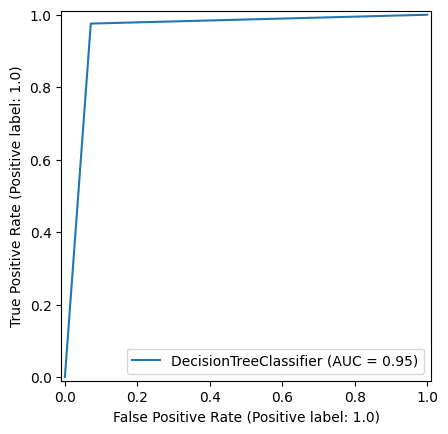

In [ ]:
Accuracy= 100 * accuracy_score(Y_test, Y_pred)
print(Accuracy)

from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))


metrics.RocCurveDisplay.from_estimator(clf , X_test_pca, Y_test)
plt.show()



GAUSSIAN NAIVE BAYE'S

96.875
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        14
         1.0       1.00      0.96      0.98        82

    accuracy                           0.97        96
   macro avg       0.91      0.98      0.94        96
weighted avg       0.97      0.97      0.97        96



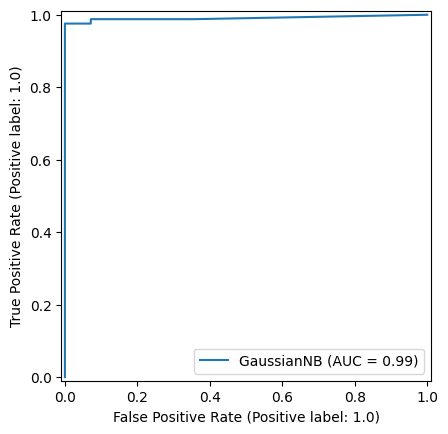

In [ ]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_pca, Y_train)

Y_pred = gnb.predict(X_test_pca)
accuracy = 100 * (accuracy_score(Y_test, Y_pred))
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))



metrics.RocCurveDisplay.from_estimator(gnb , X_test_pca, Y_test)
plt.show()

In [ ]:
from sklearn.svm import LinearSVC


In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train_pca, Y_train)


SVC(kernel='linear', random_state=0)

In [ ]:
Y_pred= classifier.predict(X_test_pca)

98.95833333333334
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        14
         1.0       0.99      1.00      0.99        82

    accuracy                           0.99        96
   macro avg       0.99      0.96      0.98        96
weighted avg       0.99      0.99      0.99        96



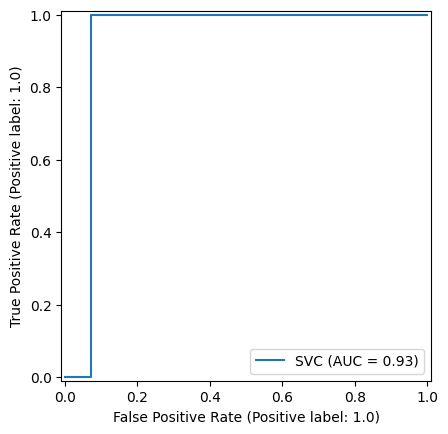

In [ ]:
print(accuracy_score(Y_test, Y_pred)*100)

from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))


metrics.RocCurveDisplay.from_estimator(classifier , X_test_pca, Y_test)
plt.show()


In [ ]:
# prompt: make ensemble with top 4 model

import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier

# Assuming your top 4 models are:
# 1. RandomForestClassifier (clf_rf)
# 2. LogisticRegression (clf_lr)
# 3. XGBClassifier (clf_xgb)
# 4. DecisionTreeClassifier (clf_dt)

# You'll need to retrain your models here if you haven't already
clf_rf = RandomForestClassifier(n_estimators=10)
clf_rf.fit(X_train_pca, Y_train)

clf_lr = LogisticRegression(random_state=0, solver='liblinear', max_iter=300, multi_class='ovr')
clf_lr.fit(X_train_pca, Y_train)

clf_xgb = XGBClassifier(n_estimators=20)
clf_xgb.fit(X_train_pca, Y_train)

clf_dt = DecisionTreeClassifier(criterion='entropy', random_state=60)
clf_dt.fit(X_train_pca, Y_train)


# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', clf_rf), ('lr', clf_lr), ('xgb', clf_xgb), ('dt', clf_dt)], voting='hard') #'hard' or 'soft'

# Train the ensemble model
ensemble_model.fit(X_train_pca, Y_train)

# Make predictions
Y_pred = ensemble_model.predict(X_test_pca)

# Evaluate the ensemble model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Ensemble Model Accuracy: {accuracy}")
print(metrics.classification_report(Y_test, Y_pred))

metrics.RocCurveDisplay.from_estimator(ensemble_model, X_test_pca, Y_test)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Ensemble Model Accuracy: 0.9791666666666666
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        14
         1.0       1.00      0.98      0.99        82

    accuracy                           0.98        96
   macro avg       0.94      0.99      0.96        96
weighted avg       0.98      0.98      0.98        96



AttributeError: VotingClassifier has none of the following attributes: predict_proba, decision_function.

Ensemble Model Accuracy: 0.9895833333333334
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        14
         1.0       0.99      1.00      0.99        82

    accuracy                           0.99        96
   macro avg       0.99      0.96      0.98        96
weighted avg       0.99      0.99      0.99        96



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


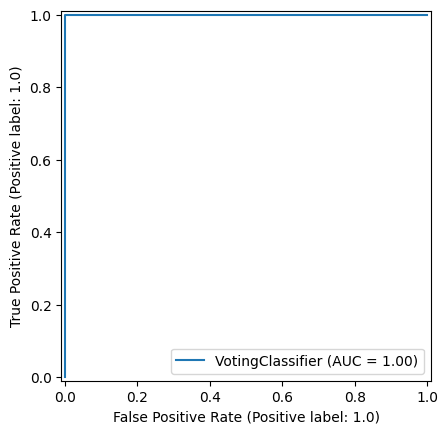

In [ ]:
# prompt: make a ensemble model with 3 models include RF,SVM,LR

import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier

# Assuming your top 3 models are:
# 1. RandomForestClassifier (clf_rf)
# 2. SVC (clf_svc)
# 3. LogisticRegression (clf_lr)

# You'll need to retrain your models here if you haven't already
clf_rf = RandomForestClassifier(n_estimators=10)
clf_rf.fit(X_train_pca, Y_train)

clf_svc = SVC(kernel='linear', random_state=0, probability=True) # probability=True for soft voting
clf_svc.fit(X_train_pca, Y_train)

clf_lr = LogisticRegression(random_state=0, solver='liblinear', max_iter=300, multi_class='ovr')
clf_lr.fit(X_train_pca, Y_train)


# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', clf_rf), ('svc', clf_svc), ('lr', clf_lr)], voting='soft') #'hard' or 'soft'

# Train the ensemble model
ensemble_model.fit(X_train_pca, Y_train)

# Make predictions
Y_pred = ensemble_model.predict(X_test_pca)

# Evaluate the ensemble model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Ensemble Model Accuracy: {accuracy}")
print(metrics.classification_report(Y_test, Y_pred))

metrics.RocCurveDisplay.from_estimator(ensemble_model, X_test_pca, Y_test)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Ensemble Model Accuracy: 0.9895833333333334
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        14
         1.0       0.99      1.00      0.99        82

    accuracy                           0.99        96
   macro avg       0.99      0.96      0.98        96
weighted avg       0.99      0.99      0.99        96



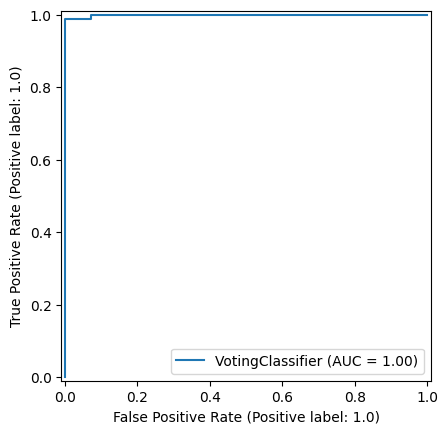

In [ ]:
# prompt:  make a ensemble model with models include RF,SVM,LR,XGBOOST RESULTS ON DECIMAL

import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier

# Assuming your top 4 models are:
# 1. RandomForestClassifier (clf_rf)
# 2. SVC (clf_svc)
# 3. LogisticRegression (clf_lr)
# 4. XGBClassifier (clf_xgb)

# You'll need to retrain your models here if you haven't already
clf_rf = RandomForestClassifier(n_estimators=10)
clf_rf.fit(X_train_pca, Y_train)

clf_svc = SVC(kernel='linear', random_state=0, probability=True) # probability=True for soft voting
clf_svc.fit(X_train_pca, Y_train)

clf_lr = LogisticRegression(random_state=0, solver='liblinear', max_iter=300, multi_class='ovr')
clf_lr.fit(X_train_pca, Y_train)

clf_xgb = XGBClassifier(n_estimators=20)
clf_xgb.fit(X_train_pca, Y_train)


# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', clf_rf), ('svc', clf_svc), ('lr', clf_lr), ('xgb', clf_xgb)], voting='soft') #'hard' or 'soft'

# Train the ensemble model
ensemble_model.fit(X_train_pca, Y_train)

# Make predictions
Y_pred = ensemble_model.predict(X_test_pca)

# Evaluate the ensemble model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Ensemble Model Accuracy: {accuracy}")
print(metrics.classification_report(Y_test, Y_pred))

metrics.RocCurveDisplay.from_estimator(ensemble_model, X_test_pca, Y_test)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Ensemble Model Accuracy: 0.9791666666666666
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        14
         1.0       0.99      0.99      0.99        82

    accuracy                           0.98        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.98      0.98      0.98        96



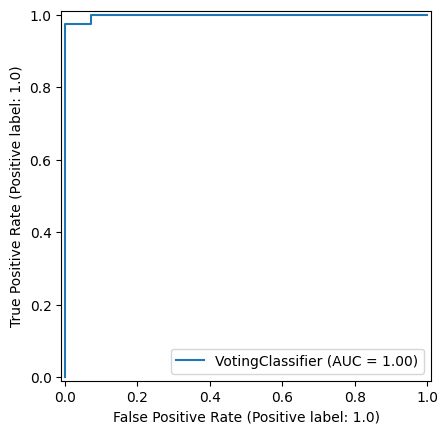

In [ ]:
# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', clf_rf), ('lr', clf_lr), ('xgb', clf_xgb), ('dt', clf_dt)], voting='soft') #Changed 'hard' to 'soft'

# Train the ensemble model
ensemble_model.fit(X_train_pca, Y_train)

# Make predictions
Y_pred = ensemble_model.predict(X_test_pca)

# Evaluate the ensemble model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Ensemble Model Accuracy: {accuracy}")
print(metrics.classification_report(Y_test, Y_pred))

metrics.RocCurveDisplay.from_estimator(ensemble_model, X_test_pca, Y_test)
plt.show()